In [1]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(file_path):
    """
    Reads data from a text file and returns it as a NumPy array.

    Args:
        file_path (str): Path to the text file.

    Returns:
        ndarray: Data read from the text file.
    """
    data = np.loadtxt(file_path)
    return data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_vs_coordinate_index(data, coordinate_index, title):
    """
    Plots a given against the specified coordinate_index from the input data.

    Args:
        data (ndarray): Input data array.
        coordinate_index (int): Index of the coordinate to plot.
        title (str): Title for the plot.

    Returns:
        None
    """
    x_axis = range(len(data[:, coordinate_index]))
    plt.plot(x_axis, data[:, coordinate_index])
    plt.title(title)
    plt.xlabel('Line Number')
    plt.ylabel(f'Coordinate {coordinate_index+1}')
    plt.grid()
    plt.show()

In [3]:
def plot_shifted_coordinate(data, coordinate_index, delta_n):
    """
    Plots a specific coordinate against itself shifted by delta_n rows from the input data.

    Args:
        data (ndarray): Input data array.
        coordinate_index (int): Index of the coordinate to plot.
        delta_n (int): Number of rows to shift the coordinate.

    Returns:
        None
    """
    shifted_coordinate = np.roll(data[:, coordinate_index], shift=delta_n)
    plt.plot(shifted_coordinate, data[:, coordinate_index])
    plt.title(f"Coordinate {coordinate_index+1} against itself shifted by {delta_n} rows")
    plt.xlabel('Shifted Coordinate')
    plt.ylabel(f'Coordinate {coordinate_index+1}')
    plt.grid()
    plt.show()

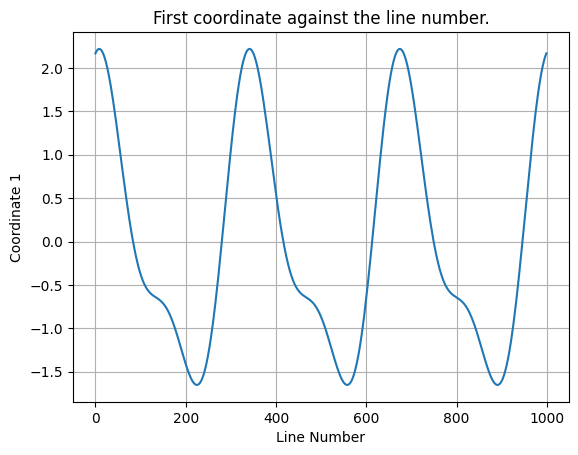

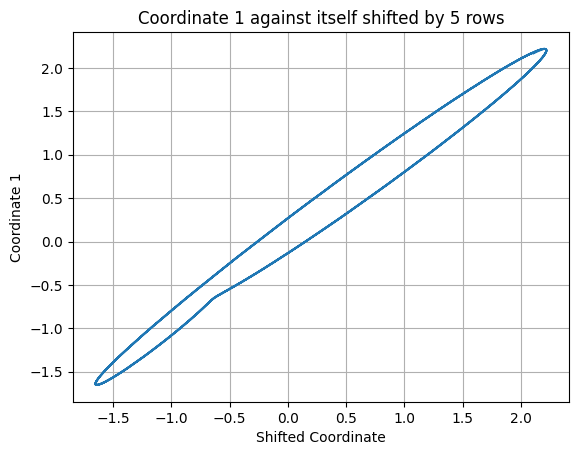

In [4]:
# Read data from the text file
path_to_input_data = '/content/takens_1.txt'
data = read_data_from_file(path_to_input_data)

# Plot the first coordinate against the line number
plot_data_vs_coordinate_index(data, coordinate_index=0, title="First coordinate against the line number.")

# Plot the first coordinate against itself shifted by delta_n rows
delta_n = 5
coordinate_index = 0
plot_shifted_coordinate(data, coordinate_index, delta_n)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_step(point, s, b, r):
    """
    Calculates the partial derivatives of the Lorenz system at a given point.

    Args:
        point (tuple): Tuple representing the (x, y, z) coordinates of the point.
        s (float): Parameter 's' in the Lorenz system.
        b (float): Parameter 'b' in the Lorenz system.
        r (float): Parameter 'r' in the Lorenz system.

    Returns:
        tuple: Tuple representing the (x_dot, y_dot, z_dot) partial derivatives at the given point.
    """
    x, y, z = point
    x_dot = s * (y - x)
    y_dot = x * (r - z) - y
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot

def lorenz_traj(dt=0.02, tot_sim_time=1000, start_x=(10, 10, 10), s=10, b=2.667, r=28, plot=True):
    """
    Simulates the Lorenz system and returns the trajectory points.

    Args:
        dt (float): Time step width for simulation.
        tot_sim_time (float): Total simulation time.
        start_x (tuple): Tuple representing the initial (x, y, z) coordinates.
        s (float): Parameter 's' in the Lorenz system.
        b (float): Parameter 'b' in the Lorenz system.
        r (float): Parameter 'r' in the Lorenz system.
        plot (bool): Whether to plot the trajectory or not.

    Returns:
        ndarray: Array of trajectory points with shape (steps+1, 3).
    """
    steps = int(tot_sim_time // dt)
    xs = np.empty(steps + 1)
    ys = np.empty(steps + 1)
    zs = np.empty(steps + 1)

    xs[0], ys[0], zs[0] = start_x[0], start_x[1], start_x[2]

    for i in range(steps):
        x_dot, y_dot, z_dot = lorenz_step((xs[i], ys[i], zs[i]), s, b, r)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    if plot:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(xs, ys, zs, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        plt.show()

    traj_pts = np.column_stack((xs, ys, zs))
    return traj_pts

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_step(point, s, b, r):
    """
    Calculates the partial derivatives of the Lorenz system at a given point.

    Args:
        point (tuple): Tuple representing the (x, y, z) coordinates of the point.
        s (float): Parameter 's' in the Lorenz system.
        b (float): Parameter 'b' in the Lorenz system.
        r (float): Parameter 'r' in the Lorenz system.

    Returns:
        tuple: Tuple representing the (x_dot, y_dot, z_dot) partial derivatives at the given point.
    """
    x, y, z = point
    x_dot = s * (y - x)
    y_dot = x * (r - z) - y
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot

def plot_lorenz_trajectory(traj_pts):
    """
    Plots the Lorenz trajectory.

    Args:
        traj_pts (ndarray): Array of trajectory points with shape (steps+1, 3).
    """
    xs, ys, zs = traj_pts[:, 0], traj_pts[:, 1], traj_pts[:, 2]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.show()

def lorenz_traj(dt=0.02, tot_sim_time=1000, start_x=(10, 10, 10), s=10, b=2.667, r=28):
    """
    Simulates the Lorenz system and returns the trajectory points.

    Args:
        dt (float): Time step width for simulation.
        tot_sim_time (float): Total simulation time.
        start_x (tuple): Tuple representing the initial (x, y, z) coordinates.
        s (float): Parameter 'sigma': Prandtl number.
        b (float): Parameter 'beta'
        r (float): Parameter 'rho': Rayleigh number

    Returns:
        ndarray: Array of trajectory points with shape (steps+1, 3).
    """
    steps = int(tot_sim_time // dt)
    xs = np.empty(steps + 1)
    ys = np.empty(steps + 1)
    zs = np.empty(steps + 1)

    xs[0], ys[0], zs[0] = start_x[0], start_x[1], start_x[2]

    for i in range(steps):
        x_dot, y_dot, z_dot = lorenz_step((xs[i], ys[i], zs[i]), s, b, r)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    traj_pts = np.column_stack((xs, ys, zs))

    return traj_pts

In [7]:
lorenz_sim_time = 100  # Total simulation time
dt = 0.001  # Time step size
start_x = (10, 10, 10)  # Initial values for x, y, z coordinates
s = 10  # Parameter 'sigma': Prandtl number
b = 8/3  # Parameter 'beta'
r = 28  # Parameter 'rho': Rayleigh number

traj = lorenz_traj(dt=dt, tot_sim_time=lorenz_sim_time, start_x=start_x, s=s, b=b, r=r)

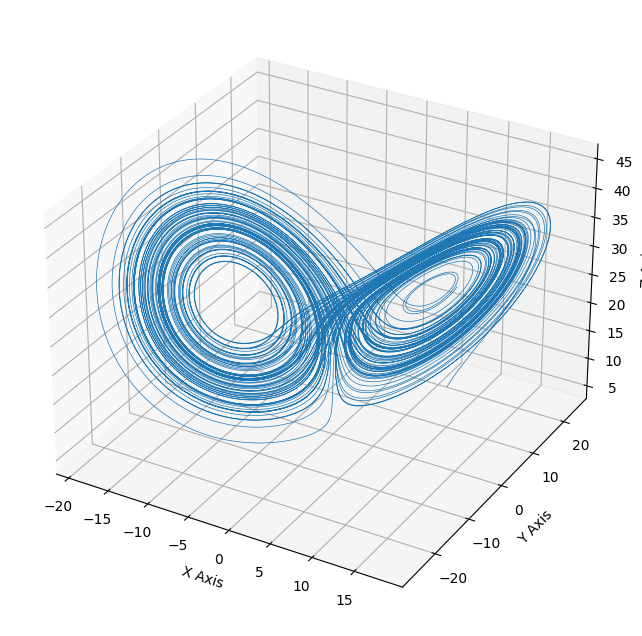

In [8]:
plot_lorenz_trajectory(traj)

In [9]:
# Plot the approximation of the Lorenz attractor using x1 = x(t), x2 = x(t + delta_t), x3 = x(t + 2*delta_t)
delta_t = 50
x1 = traj[:, 0]
x2 = np.roll(x1, shift=delta_t)
x3 = np.roll(x1, shift=2*delta_t)
reconstructed_traj_pts = np.column_stack((x1, x2, x3))


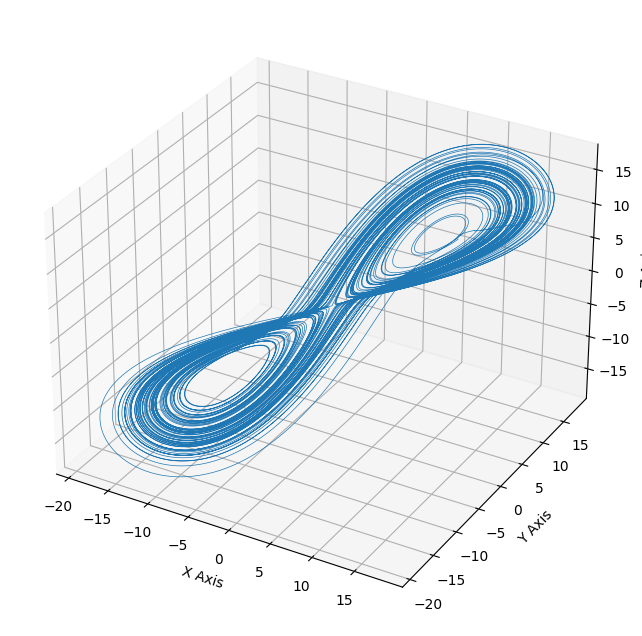

In [10]:
plot_lorenz_trajectory(reconstructed_traj_pts)

In [11]:
# Plot the approximation of the Lorenz attractor using z1=z(t), z2=z(t + delta_t), z3=x(z + 2*delta_t)
delta_t = 50
z1 = traj[:, 2]
z2 = np.roll(z1, shift=delta_t)
z3 = np.roll(z1, shift=2*delta_t)
reconstructed_traj_pts = np.column_stack((z1, z2, z3))

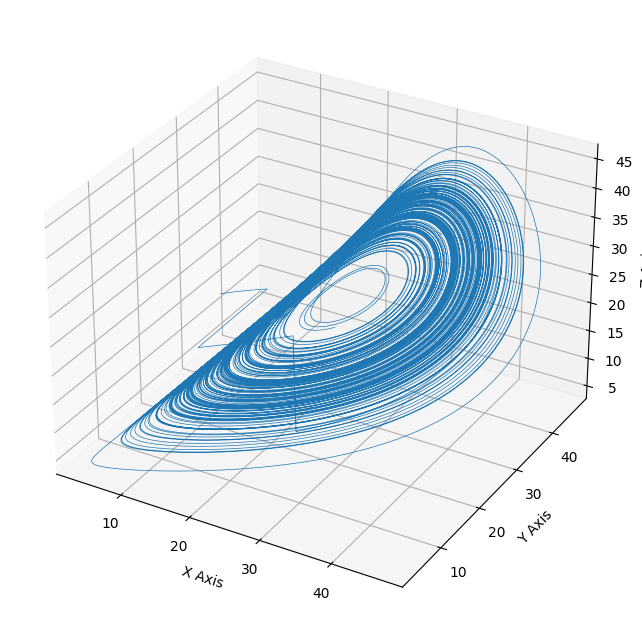

In [12]:
plot_lorenz_trajectory(reconstructed_traj_pts)